# `sequgen` demo with five signal models

This sequgen demo shows how you can use five different signal models and how they can be combined. We start with importing the packages required for running the demo:

In [1]:
from matplotlib import pyplot as plt
import numpy
from sequgen.deterministic.sine import sine
from sequgen.deterministic.triangular_peak import triangular_peak
from sequgen.deterministic.constant import constant
from sequgen.deterministic.normal_peak import normal_peak
from sequgen.stochastic.gaussian import gaussian
from sequgen.parameter_space import ParameterSpace
from sequgen.dimension import Dimension

If this command fails to load the `sequgen` models, please check if you followed the installation steps present in the [README](https://github.com/sequgen/notebooks#notebooks) before running this notebook. 

We need a function to plot the signals:

In [2]:
def plot(time_points, signal_points, title, parameters=None, values=None):
    plt.figure()
    plt.plot(time_points, signal_points, ".b-")
    if parameters != None:
        title += " (" + parameters.format_str().format(**values) + ")"
    plt.title(title)
    plt.grid(True)
    plt.show()

## Signal 1

The first signal is a constant. The signal has one parameter which can take a value between 1 and 2. We define the parameter of the signal like this:

In [3]:
signal_1_parameter_space = ParameterSpace([
    Dimension("value", 1, 2)
])

Next, we select an arbitrary values for the parameter with the instruction `sample`.

In [4]:
signal_1_parameters = signal_1_parameter_space.sample()
print(signal_1_parameters)

{'value': 1.0891081613281477}


Then we define the time points (x=axis) as a space between 0 and 20 divided in 100 sections. We will re-use these time points for the other signals.

In [5]:
time_points = numpy.linspace(0, 20, 101)
print(time_points)

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8 20. ]


With the time points and the signal parameters, we can use the `constant` function to create the signal and plot the results:

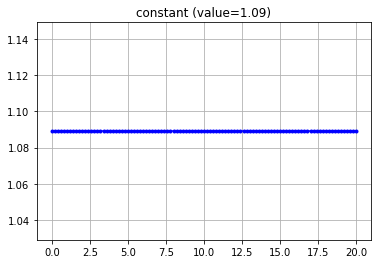

In [6]:
signal_1_points = constant(time_points, **signal_1_parameters)
title_1 = "constant"
plot(time_points, signal_1_points, title_1, signal_1_parameter_space, signal_1_parameters)

## Signal 2

The second signal contains a triangular peak, similar to the signal in the notebook [test_mvp.ipynb](test_mvp.ipynb). We need four parameters which can take variable values: the height of the peak, the time position of the peak and the left and right widths of the trianglular peak. For example, the peak height can have a value between 1 and 2. We add a fifth constant parameter `sign` in order to get a negative peak.

In [7]:
signal_2_parameter_space = ParameterSpace([
    Dimension("height", 1, 2),
    Dimension("placement", 5, 9),
    Dimension("width_base_left", 0.1, 0.5),
    Dimension("width_base_right", 2.0, 3.0),
    Dimension("sign", -1)
])

Next, we select arbitrary values for the parameters and generate the signal using the function `triangular_peak` and the time points defined for the first signal. Then we plot the signal.

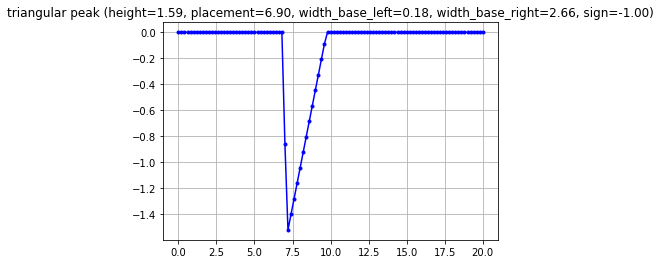

In [8]:
signal_2_parameters = signal_2_parameter_space.sample()
signal_2_points = triangular_peak(time_points, **signal_2_parameters)
title_2 = "triangular peak"
plot(time_points, signal_2_points, title_2, signal_2_parameter_space, signal_2_parameters)

## Signal 3

The third signal is a peak as well, but this time in the shape of a normal distribution. The signal has three parameters: the position on the time axis of the peak (`location`), the width of the peak (`stddev`, one-sided) and the height of the peak:

In [9]:
signal_3_parameter_space = ParameterSpace([
    Dimension("location", 11, 14),
    Dimension("stddev", 1, 2),
    Dimension("height", 0.5, 2)
])

Variable values for the parameters can be chosen with `sample` after which the signal can be created with `normal_peak` and can be plotted:

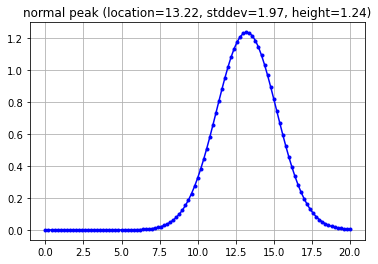

In [10]:
signal_3_parameters = signal_3_parameter_space.sample()
signal_3_points = normal_peak(time_points, **signal_3_parameters)
title_3 = "normal peak"
plot(time_points, signal_3_points, title_3, signal_3_parameter_space, signal_3_parameters)

## Signal 4

The fourth signal has a trigonometric shape (sine). We need three parameters: the amplitude of the signal, its average value and the length of a wave (period). The three parameters are defined to have variable values.

In [11]:
signal_4_parameter_space = ParameterSpace([
    Dimension("amplitude", 0, 1),
    Dimension("average", 0.1, 0.9),
    Dimension("wavelength", 3, 5),
])

Again variable values for the parameters can be chosen with `sample` and then the signal can be created with the function `sine` and be plotted:

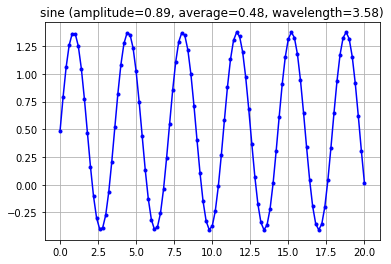

In [12]:
signal_4_parameters = signal_4_parameter_space.sample()
signal_4_points = sine(time_points, **signal_4_parameters)
title_4 = "sine"
plot(time_points, signal_4_points, title_4, signal_4_parameter_space, signal_4_parameters)

## Signal 5

The fifth signal is a noise signal. It has two parameters: its variance is defined by the parameter `stddev` while the relation between value and the previous value in the signal is registered in `correlation_length`: 

In [13]:
signal_5_parameter_space = ParameterSpace([
    Dimension("stddev", 1),
    Dimension("correlation_length", 2)
])

We select arbitrary values for the parameters with the function `sample` and generate the Gaussian noise signal with `gaussian`:

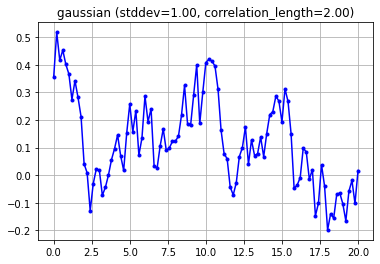

In [14]:
signal_5_parameters = signal_5_parameter_space.sample()
signal_5_points = gaussian(time_points, **signal_5_parameters)
title_5 = "gaussian"
plot(time_points, signal_5_points, title_5, signal_5_parameter_space, signal_5_parameters)

## Signal 6

The sixth signal is the sum of the first five signals. Since the five signals were defined with respect to the same time axis, they can be added to each other and the result can be plotted:

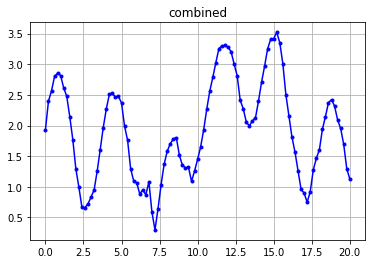

In [15]:
signal_6_points = signal_1_points + signal_2_points + signal_3_points + signal_4_points + signal_5_points
title_6 = "combined"
plot(time_points, signal_6_points, title_6)

## Create a combined graph

Finally, we plot the six signals in a single graph to make comparison easier:

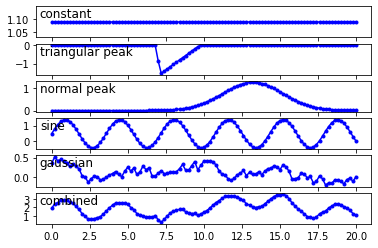

In [16]:
signal_points = [ signal_1_points, signal_2_points, signal_3_points, signal_4_points, signal_5_points, signal_6_points ]
titles = [ title_1, title_2, title_3, title_4, title_5, title_6 ]

plt.figure()
for i in range(0, len(signal_points)):
    ax = plt.subplot(len(signal_points), 1, i+1)
    plt.plot(time_points, signal_points[i], ".b-")
    plt.title(titles[i], x=0.01, y=0.45, loc="left")
plt.show()